# First Name: Richard
# Last Name: Setiawan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [3]:
#setting variables you will be working with to numeric
gapminder['oilperperson'] = pd.to_numeric(gapminder['oilperperson'],errors='coerce')
gapminder['relectricperperson'] = pd.to_numeric(gapminder['relectricperperson'],errors='coerce')
gapminder['co2emissions'] = pd.to_numeric(gapminder['co2emissions'],errors='coerce')

In [4]:
gapminder_clean=gapminder.dropna()

# Correlation - Scenario 1

# Scatter plot to show association between relectricperperson (x) and oilperperson (y)

<IPython.core.display.Javascript object>


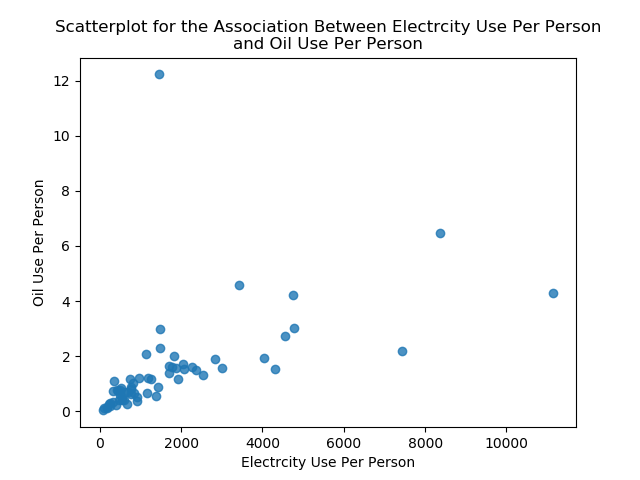

Text(0.5, 1.0, 'Scatterplot for the Association Between Electrcity Use Per Person\nand Oil Use Per Person')

In [7]:
%matplotlib notebook
plt.figure()
scat1 =  sns.regplot(x="relectricperperson", y="oilperperson", fit_reg=False, data=gapminder_clean)
plt.xlabel('Electrcity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association Between Electrcity Use Per Person' + '\n' + 'and Oil Use Per Person')

# Pearson correlation - relectricperperson (x) and oilperperson (y)

In [8]:
print ('association between relectricperperson and oilperperson')
print (scipy.stats.pearsonr(gapminder_clean['relectricperperson'], gapminder_clean['oilperperson'])) #pearson correlation

association between relectricperperson and oilperperson
(0.5249373779159884, 1.0020621767836635e-05)


# Correlation - Scenario 2

# Scatter plot to show association between co2emissions (x) and oilperperson (y)

<IPython.core.display.Javascript object>


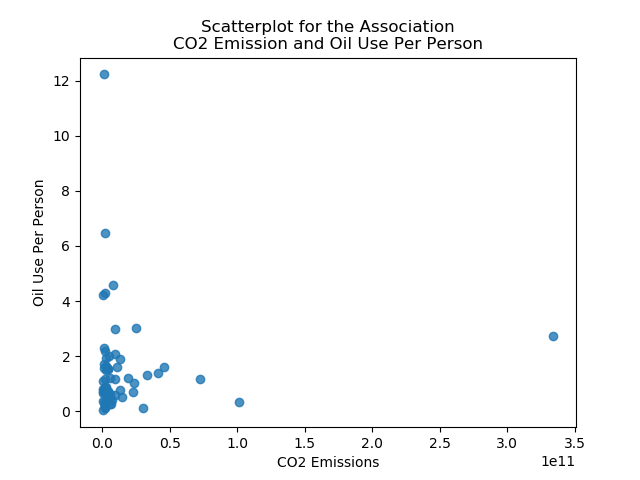

Text(0.5, 1.0, 'Scatterplot for the Association\nCO2 Emission and Oil Use Per Person')

In [9]:
%matplotlib notebook
plt.figure()
scat2 =  sns.regplot(x="co2emissions", y="oilperperson", fit_reg=False, data=gapminder)
plt.xlabel('CO2 Emissions')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association' + '\n' + 'CO2 Emission and Oil Use Per Person')

# Pearson correlation - co2emissions (x) and oilperperson (y)

In [10]:
print ('association between co2emissions and oilperperson')
print (scipy.stats.pearsonr(gapminder_clean['co2emissions'], gapminder_clean['oilperperson'])) #pearson correlation

association between co2emissions and oilperperson
(0.04444201231228793, 0.7294518840123059)


# Regression - Scenario 3

# Scatter plot with regression to show relationship between relectricperperson (x) and oilperperson (y) - with regression line

<IPython.core.display.Javascript object>


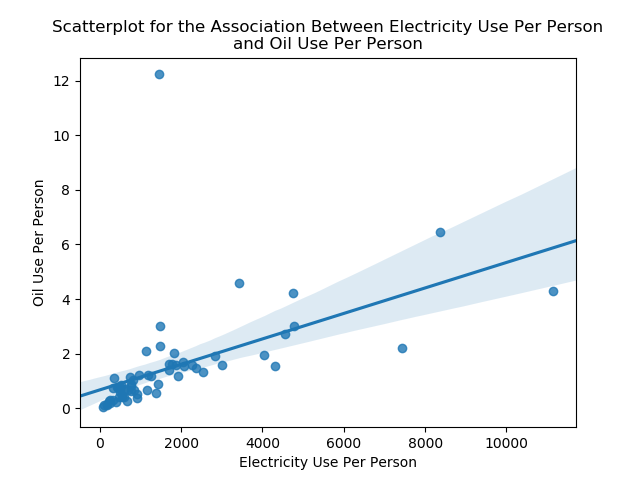

Text(0.5, 1.0, 'Scatterplot for the Association Between Electricity Use Per Person\nand Oil Use Per Person')

In [11]:
%matplotlib notebook
scat1 =  sns.regplot(x="relectricperperson", y="oilperperson", fit_reg=True, data=gapminder_clean)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association Between Electricity Use Per Person' + '\n' + 'and Oil Use Per Person')

# Regression analysis to show association between relectricperperson (x) and oilperperson (y)

In [38]:
print ("OLS regression model for the association between Electric Use Per Person and Oil Per Person")
reg1 = smf.ols('oilperperson ~ relectricperperson', data=gapminder_clean).fit()
print (reg1.summary())

OLS regression model for the association between Electric Use Per Person and Oil Per Person
                            OLS Regression Results                            
Dep. Variable:           oilperperson   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     23.20
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           1.00e-05
Time:                        09:03:46   Log-Likelihood:                -116.64
No. Observations:                  63   AIC:                             237.3
Df Residuals:                      61   BIC:                             241.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

# Residual plot -  regression analysis between relectricperperson (x) and oilperperson (y)

<IPython.core.display.Javascript object>


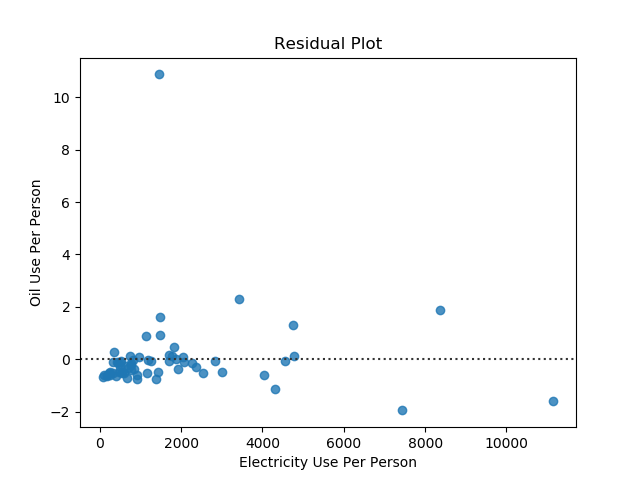

Text(0.5, 1.0, 'Residual Plot')

In [13]:
%matplotlib notebook
scat1 = sns.residplot(x="relectricperperson", y="oilperperson",  data=gapminder_clean)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Residual Plot')

# # Regression - Scenario 4

# Scatter plot with regression to show association between co2emissions (x) and oilperperson (y) - with regression line

<IPython.core.display.Javascript object>


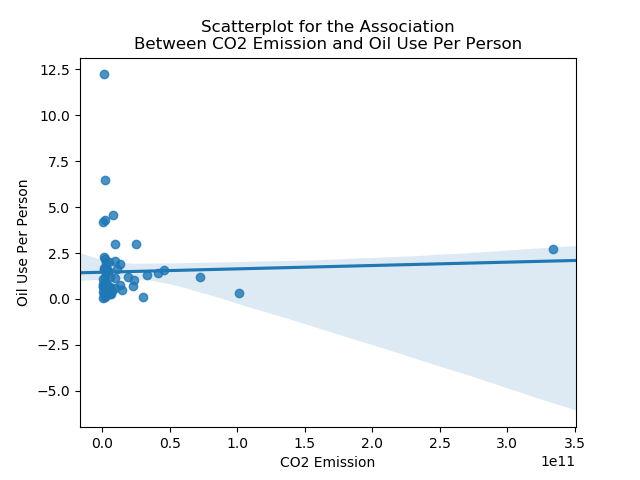

Text(0.5, 1.0, 'Scatterplot for the Association\nBetween CO2 Emission and Oil Use Per Person')

In [14]:
plt.figure()
scat2 =  sns.regplot(x="co2emissions", y="oilperperson", fit_reg=True, data=gapminder)
plt.xlabel('CO2 Emission')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association' + '\n' + 'Between CO2 Emission and Oil Use Per Person')

# Regression analysis to show association between co2emissions (x) and oilperperson (y)

In [39]:
print ("OLS regression model for the association between CO2 emission and Oil Use Per Person")
reg1 =  smf.ols('oilperperson ~ co2emissions', data=gapminder_clean).fit()
print (reg1.summary())

OLS regression model for the association between CO2 emission and Oil Use Per Person
                            OLS Regression Results                            
Dep. Variable:           oilperperson   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.1207
Date:                Sat, 28 Dec 2019   Prob (F-statistic):              0.729
Time:                        09:04:07   Log-Likelihood:                -126.73
No. Observations:                  63   AIC:                             257.5
Df Residuals:                      61   BIC:                             261.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

# Residual plot -  regression analysis between co2emissions (x) and oilperperson (y)

<IPython.core.display.Javascript object>


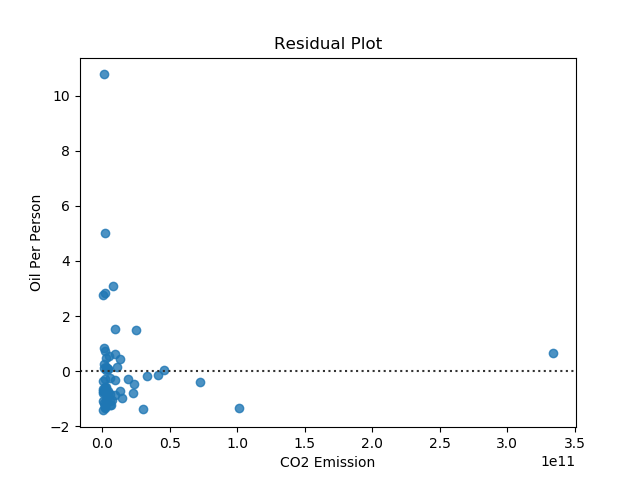

Text(0.5, 1.0, 'Residual Plot')

In [15]:
%matplotlib notebook
scat1 =  sns.residplot(x="co2emissions", y="oilperperson",  data=gapminder_clean)
plt.xlabel('CO2 Emission')
plt.ylabel('Oil Per Person')
plt.title('Residual Plot')

# Regression with 3 variables

# Use co2emissionsgrp function to divide/group data into 3 groups
# Low co2emission (1): min - 1846084167
# Medium co2emission (2): 1846084168 - 7993752800
# High co2emission (3):  7993752801 - max

In [16]:
def co2emissionsgrp  (row):
   if row['co2emissions'] <= 1846084167:
      return 1
   elif row['co2emissions'] <= 7993752800:
      return 2
   elif row['co2emissions'] > 7993752800:
      return 3

In [20]:
gapminder_clean['co2emissionsgrp'] = gapminder_clean.apply (lambda row: co2emissionsgrp (row),axis=1)
gapminder_clean[['country','co2emissionsgrp',]].head()

C:\Users\RichardS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,co2emissionsgrp
2,Algeria,2
6,Argentina,2
9,Australia,3
10,Austria,2
11,Azerbaijan,1


# Print the number of countries in each group of CO2 emission

In [22]:
chk1 = gapminder_clean['co2emissionsgrp'].value_counts(sort=False, dropna=False) 
print(chk1)

1    17
2    27
3    19
Name: co2emissionsgrp, dtype: int64


# Divide gapminder_clean into 3 dataframes, each dataframe representing rows of data in low, medium and high CO2 Emission 

In [23]:
sub1=gapminder_clean[(gapminder_clean['co2emissionsgrp']== 1)]
sub2=gapminder_clean[(gapminder_clean['co2emissionsgrp']== 2)]
sub3=gapminder_clean[(gapminder_clean['co2emissionsgrp']== 3)]

# Regression - Scenario 5

# Scatter plot with regression analysis to show association between electricity use per person (x) and oilperperson (y) for low CO2 emission countries 

<IPython.core.display.Javascript object>


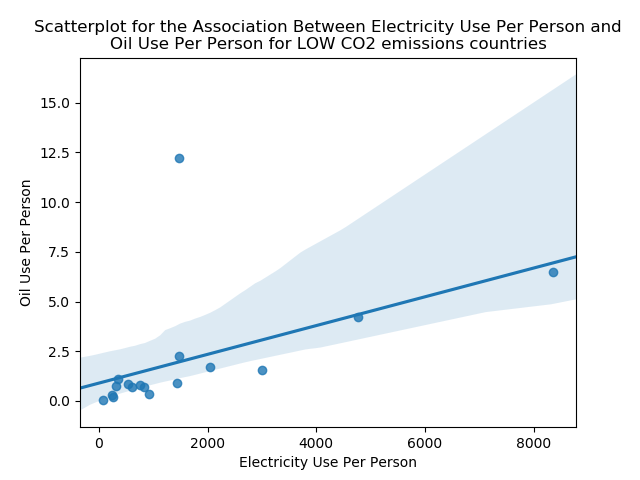

AxesSubplot(0.125,0.11;0.775x0.77)


In [24]:
%matplotlib notebook
scat1 =  sns.regplot(x="relectricperperson", y="oilperperson", data=sub1)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association Between Electricity Use Per Person and' +  '\n' + 'Oil Use Per Person for LOW CO2 emissions countries')
print (scat1)

# Regression analysis to show association between electricity use per person (x) and oilperperson (y) for low CO2 emission countries

In [26]:
print ('OLS regression model for the association between Electricty Use Per Person and Oil Use Per Person for' + '\n' + 'LOW CO2 Emission countries')
reg1 = smf.ols('oilperperson ~ relectricperperson', data=sub1).fit()
print (reg1.summary())

OLS regression model for the association between Electricty Use Per Person and Oil Use Per Person for
LOW CO2 Emission countries
                            OLS Regression Results                            
Dep. Variable:           oilperperson   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     4.840
Date:                Sat, 28 Dec 2019   Prob (F-statistic):             0.0439
Time:                        08:55:15   Log-Likelihood:                -40.387
No. Observations:                  17   AIC:                             84.77
Df Residuals:                      15   BIC:                             86.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0

# Residual plot -  regression analysis between relectricperperson (x) and oilperperson (y) for Low CO2 emission countries

<IPython.core.display.Javascript object>


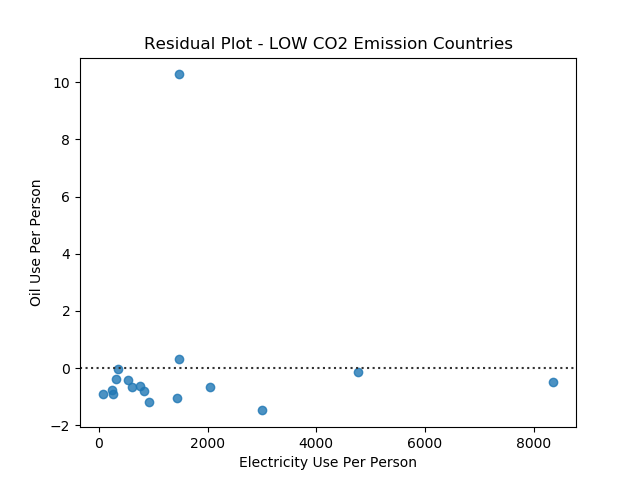

Text(0.5, 1.0, 'Residual Plot - LOW CO2 Emission Countries')

In [30]:
%matplotlib notebook
scat1 = sns.residplot(x="relectricperperson", y="oilperperson",  data=sub1)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Residual Plot - LOW CO2 Emission Countries')

# Regression - Scenario 6

# Scatter plot with regression analysis to show association between electricity use per person (x) and oilperperson (y) for medium CO2 emission countries 

<IPython.core.display.Javascript object>


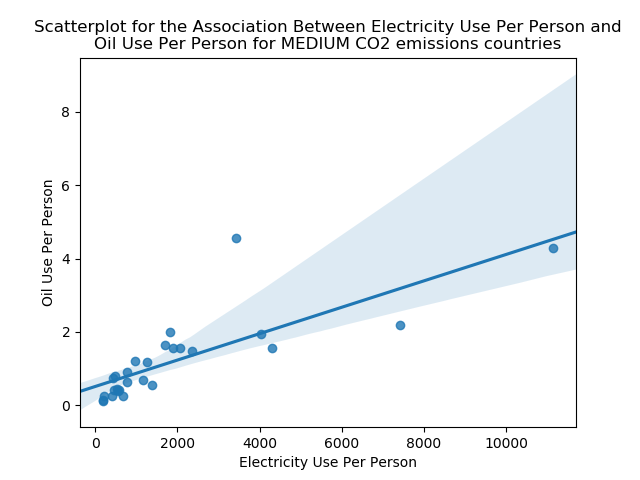

AxesSubplot(0.125,0.11;0.775x0.77)


In [31]:
%matplotlib notebook
scat1 = sns.regplot(x="relectricperperson", y="oilperperson", data=sub2)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association Between Electricity Use Per Person and' +  '\n' + 'Oil Use Per Person for MEDIUM CO2 emissions countries')
print (scat1)

In [32]:
print ('OLS regression model for the association between Electricty Use Per Person and Oil Use Per Person for' + '\n' + 'MEDIUM CO2 Emission countries')
reg1 =  smf.ols('oilperperson ~ relectricperperson', data=sub2).fit()
print (reg1.summary())

OLS regression model for the association between Electricty Use Per Person and Oil Use Per Person for
MEDIUM CO2 Emission countries
                            OLS Regression Results                            
Dep. Variable:           oilperperson   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     41.89
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           8.88e-07
Time:                        08:59:23   Log-Likelihood:                -27.631
No. Observations:                  27   AIC:                             59.26
Df Residuals:                      25   BIC:                             61.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025    

# Residual plot -  regression analysis between relectricperperson (x) and oilperperson (y) for Medium CO2 emission countries

<IPython.core.display.Javascript object>


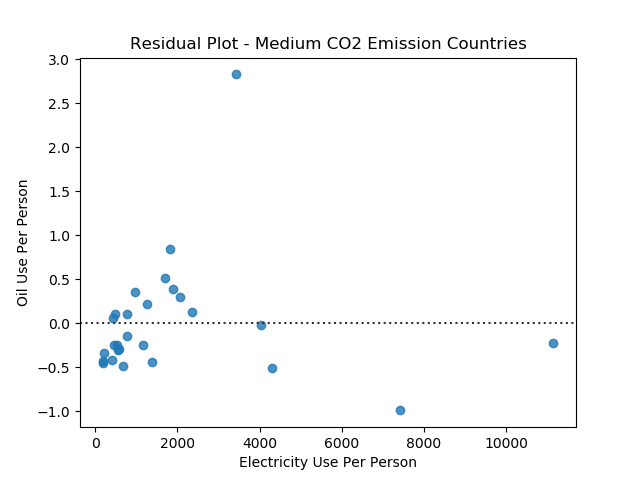

Text(0.5, 1.0, 'Residual Plot - Medium CO2 Emission Countries')

In [33]:
%matplotlib notebook
scat1 =  sns.residplot(x="relectricperperson", y="oilperperson",  data=sub2)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Residual Plot - Medium CO2 Emission Countries')

# Regression - Scenario 7

# Scatter plot with regression analysis to show association between electricity use per person (x) and oilperperson (y) for high CO2 emission countries 

<IPython.core.display.Javascript object>


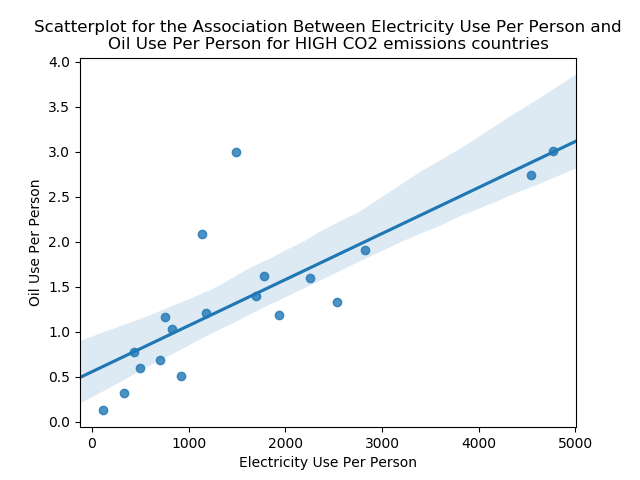

AxesSubplot(0.125,0.11;0.775x0.77)


In [34]:
%matplotlib notebook
scat1 = sns.regplot(x="relectricperperson", y="oilperperson", data=sub3)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Scatterplot for the Association Between Electricity Use Per Person and' +  '\n' + 'Oil Use Per Person for HIGH CO2 emissions countries')
print (scat1)

In [36]:
print ('OLS regression model for the association between Electricty Use Per Person and Oil Use Per Person for' + '\n' + 'HIGH CO2 Emission countries')
reg1 =  smf.ols('oilperperson ~ relectricperperson', data=sub3).fit()
print (reg1.summary())

OLS regression model for the association between Electricty Use Per Person and Oil Use Per Person for
HIGH CO2 Emission countries
                            OLS Regression Results                            
Dep. Variable:           oilperperson   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     27.61
Date:                Sat, 28 Dec 2019   Prob (F-statistic):           6.45e-05
Time:                        09:02:28   Log-Likelihood:                -14.302
No. Observations:                  19   AIC:                             32.60
Df Residuals:                      17   BIC:                             34.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      

# Residual plot -  regression analysis between relectricperperson (x) and oilperperson (y) for High CO2 emission countries

<IPython.core.display.Javascript object>


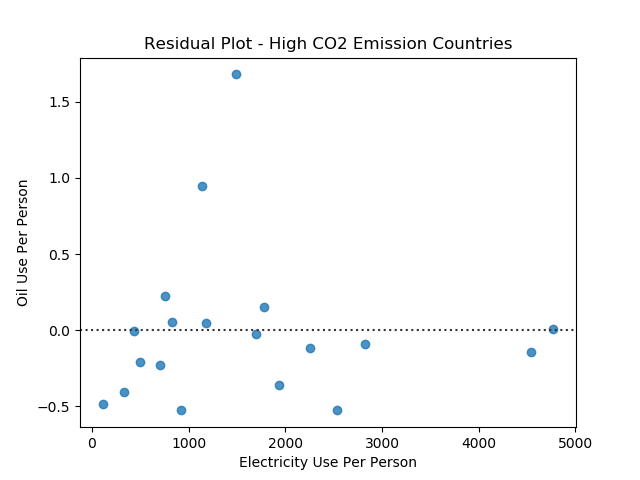

Text(0.5, 1.0, 'Residual Plot - High CO2 Emission Countries')

In [40]:
%matplotlib notebook
scat1 = sns.residplot(x="relectricperperson", y="oilperperson",  data=sub3)
plt.xlabel('Electricity Use Per Person')
plt.ylabel('Oil Use Per Person')
plt.title('Residual Plot - High CO2 Emission Countries')